# Drug Recommendation System

## Business Problem

Drug reviews play a very important role in providing crucial medical care information for both healthcare professionals and consumers. Analyzing the drug reviews will be useful to recommend the best drugs for a given condition.

### Problem Statement:

Build a Drug recommender system that recommends the most effective drug for the given condition based on the reviews of various drugs used for that condition.

## Machine Learning Problem

### Data Overview

- The dataset used is ‘UCI ML Drug Review Dataset’.
- Data source: https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018
- Data will be provided in two files:
<br>
<b>drugsComTrain_raw.csv</b> contains 7 columns: uniqueID, drugName, condition, review, rating, date, usefulCount </br>
<b>drugsComTest_raw.csv</b> contains same columns
<br>
Number of rows in Train dataset is - 161297 and Test dataset is - 53766


### Mapping the real-world problem to ML problem

<b>Objective</b>: Given a review, determine whether the review is Positive or Negative
<br>
Based on the reviews classification, a Recommendation score need to be calculated for recommending the best effective drug.
</br>

We can use the given ratings to classify the reviews. The target feature is created by classifying the reviews as positive with ratings 6-10 and negative with ratings 1-5.

#### Type of Machine Learning Problem

Here the reviews need to classified to Positive and Negative classes. Hence it is a Binary Classification Problem 

#### Constraints

- Errors can be very costly.
- Probability of a data point belonging to each class is needed.

#### Performance metrics

- F1 Score, Precision, Recall and Confusion Matrix

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [2]:
import nltk
import regex as re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
data_train = pd.read_csv('drugsComTrain_raw.csv')
data_test = pd.read_csv('drugsComTest_raw.csv')

In [4]:
print('Size of Train dataset is:',data_train.shape)
print('Size of Test dataset is:',data_test.shape)

Size of Train dataset is: (161297, 7)
Size of Test dataset is: (53766, 7)


In [5]:
print('Columns of the dataset are:\n',data_train.columns)

Columns of the dataset are:
 Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [6]:
print('Overview of Train dataset:\n')
data_train.head(5)

Overview of Train dataset:



,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
print('Overview of Test dataset:\n')
data_test.head(5)

Overview of Test dataset:



,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


- The Train and Test datasets has same features. In both of the datasets we need to preprocess and create the target variable. 
- So, we can concatenate the datasets and then preprocess and create the target variable accordingly.
- Before the modelling the whole data can be splitted to train and test.

In [8]:
data = pd.concat([data_train,data_test])
print('The size of the combined data is:',data.shape)

The size of the combined data is: (215063, 7)


In [9]:
# resetting the index after concatenation

data.reset_index(inplace=True,drop=True)
data.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20
215062,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46


In [10]:
#checking for data types in the dataset 
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

we have 3 numerical and 4 categorical features.

In [11]:
#checking the description of the data
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


average rating given is ~7 and upvotes as 28

In [12]:
#checking for Null values 
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

Only condition feature has Null Values in dataset.

In [13]:
#checking for the number of null values and percentage in given dataset

null_size = data.isnull().sum()['condition']
print('Total null values are:',null_size)
data_size = data.shape[0]
print('Percentage of null values are:',(null_size/data_size)*100)

Total null values are: 1194
Percentage of null values are: 0.5551861547546533


- Null values are 0.5% of the total data points in Train and Test datasets. Hence we can drop the data points with null values.

In [14]:
# dropping the rows with null values

data = data.dropna(axis=0)
print('Size of the dataset after dropping null values:',data.shape)

Size of the dataset after dropping null values: (213869, 7)


In [15]:
# checking for number of unique conditions

print('Number of unique conditions are:',data['condition'].unique().shape[0])

Number of unique conditions are: 916


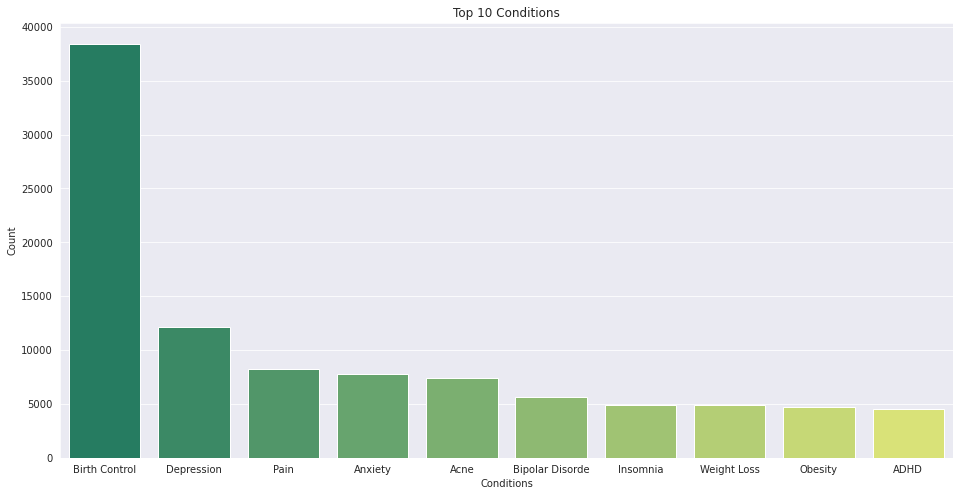

In [15]:
# plotting the top 10 conditions

conditions = dict(data['condition'].value_counts())
top_conditions = list(conditions.keys())[0:10]
values = list(conditions.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=values,palette='summer')
plt.title('Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.show()

- This plot shows that Birth Control is the top most people suffering condition  in given dataset followed by Depression, Pain, Anxiety and so on..

- After analyzing the above conditions, there are some conditions given as <b>'0<//span> users found this comment helpful.'</b> which is not the correct condition. 
- Also there is condition named as <b>'Not Listed / Othe'</b>
- We can remove the rows with these conditions as we cannot recommend any drug here. 

In [17]:
#calculating the number of drugs for each given condition
val=[]
for c in list(conditions.keys()):
    val.append(data[data['condition']==c]['drugName'].nunique())
    
drug_cond = dict(zip(list(conditions.keys()),val))    

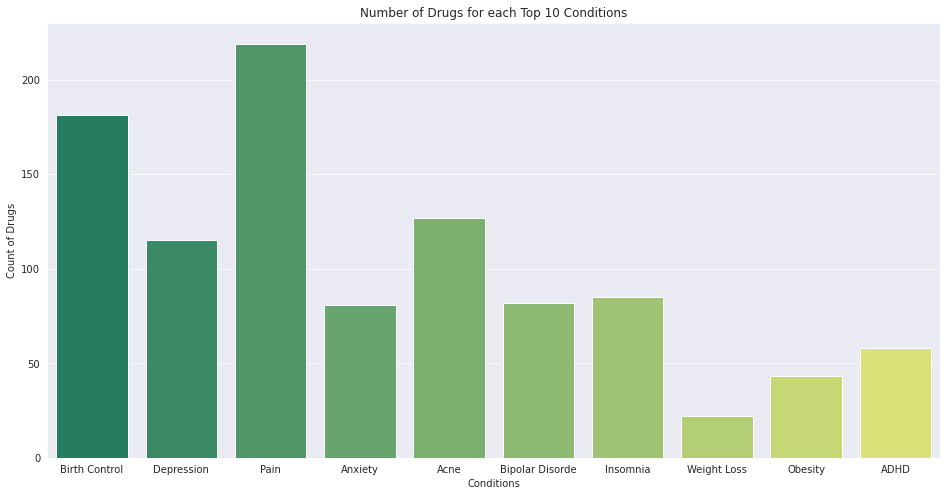

In [18]:
# plotting number of drugs for top 10 condition 
top_conditions = list(drug_cond.keys())[0:10]
values = list(drug_cond.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=values,palette='summer')
plt.title('Number of Drugs for each Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count of Drugs')
plt.show()

- There are multiple drugs used by patients for each condition. 
- Pain and Birth Control conditions has highest number of different drugs available.  
- This shows that it is necessary to analyze and recommend the most effective drug for each condition from the available drugs.
- There are few conditions where only 1 drug is used by patient.

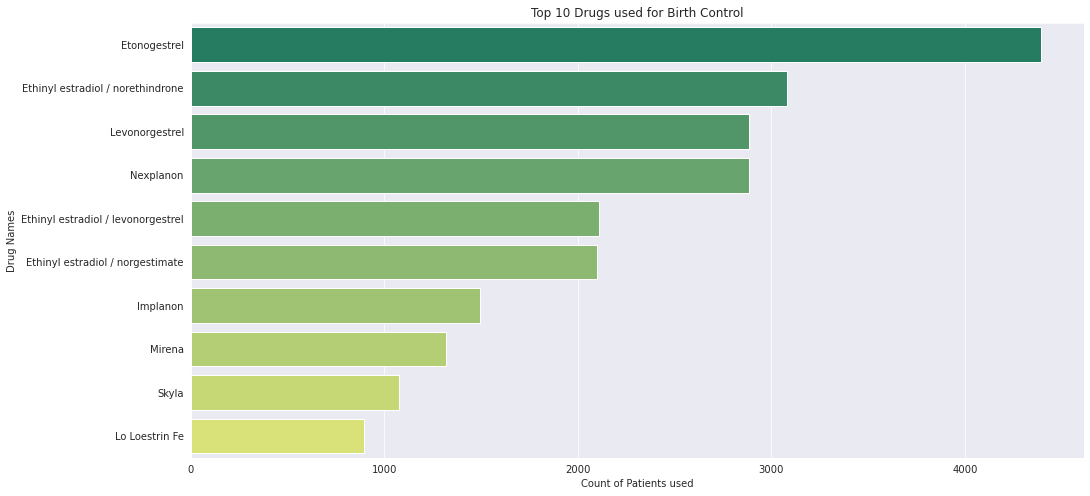

In [19]:
#plotting the most used drug for Birth Control

drugs_birth = dict(data[data['condition']=='Birth Control']['drugName'].value_counts())

top_drugs = list(drugs_birth.keys())[0:10]
values = list(drugs_birth.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs used for Birth Control')
plt.ylabel('Drug Names')
plt.xlabel('Count of Patients used')
plt.show()

- This plot helps to understand, even if the condition has wide variety of drugs but the most used drugs are very few in number. Etonogestrol is most used drug by patients.

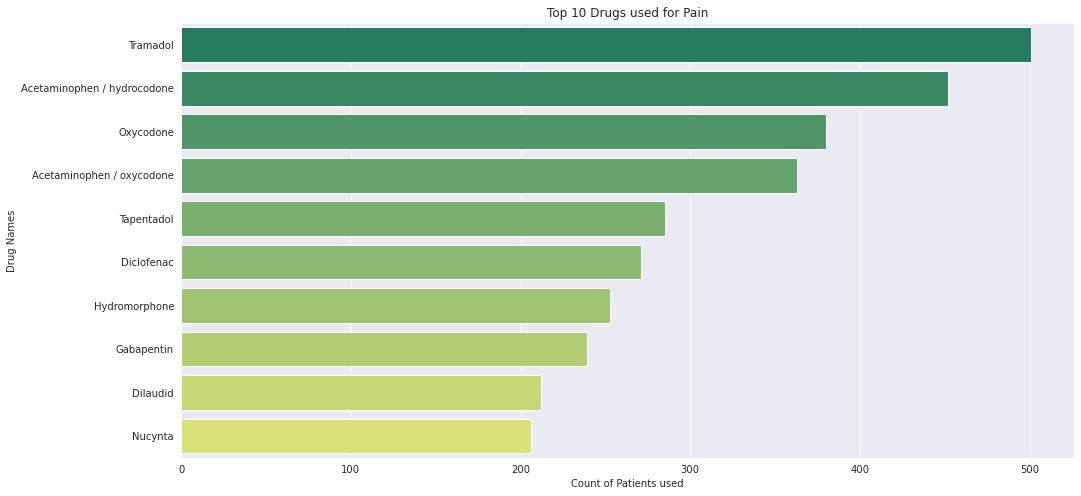

In [20]:
#plotting the most used drug for Pain

drugs_pain = dict(data[data['condition']=='Pain']['drugName'].value_counts())

top_drugs = list(drugs_pain.keys())[0:10]
values = list(drugs_pain.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs used for Pain')
plt.ylabel('Drug Names')
plt.xlabel('Count of Patients used')
plt.show()

- Unlike above plot, here each drug has good number of usage count

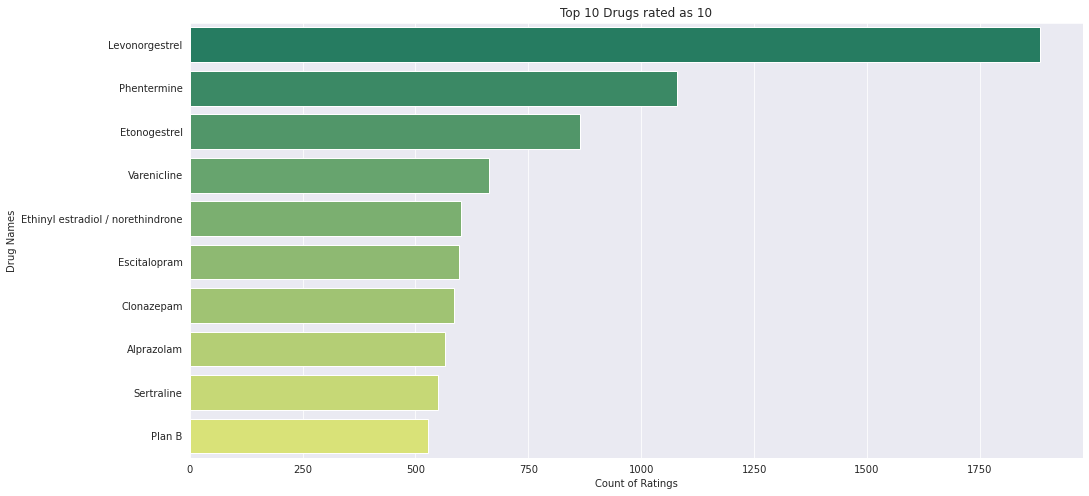

In [21]:
# plotting the top 10 drugs rated as 10
drugs_rating = dict(data[data['rating']==10]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:10]
values = list(drugs_rating.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs rated as 10')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

- Birth Control and Weight Loss/Obesity drugs are top rated. 

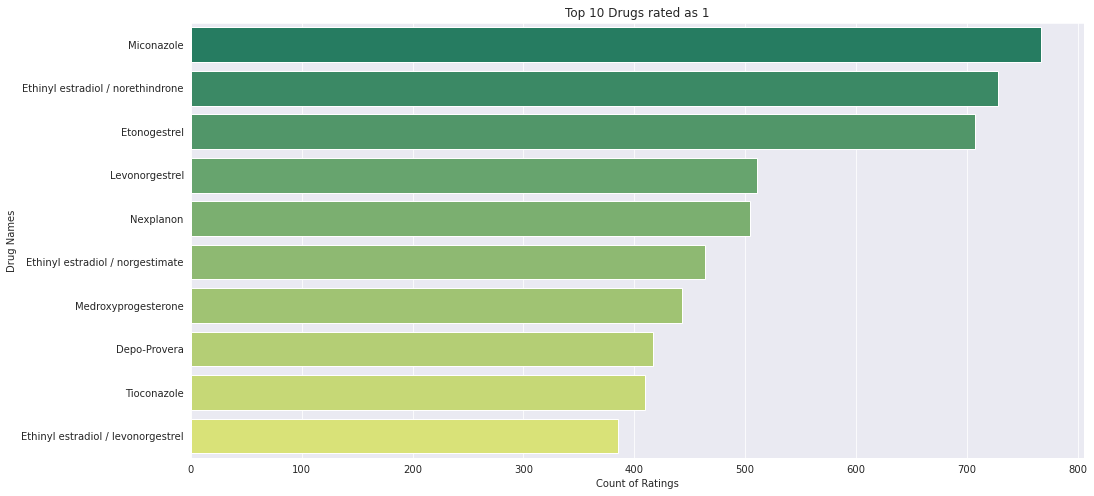

In [22]:
# plotting the top 10 drugs rated as 1
drugs_rating = dict(data[data['rating']==1]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:10]
values = list(drugs_rating.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs rated as 1')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

- This plot shares an ineteresting insight. The two Drugs Levonogestrol and Etonogestrel are in top 10 drugs with ratings '10' as well as '1'.
- This implies there might be certain patients where the drugs were not effective or resulted in severe side effects which made it in less ratings.

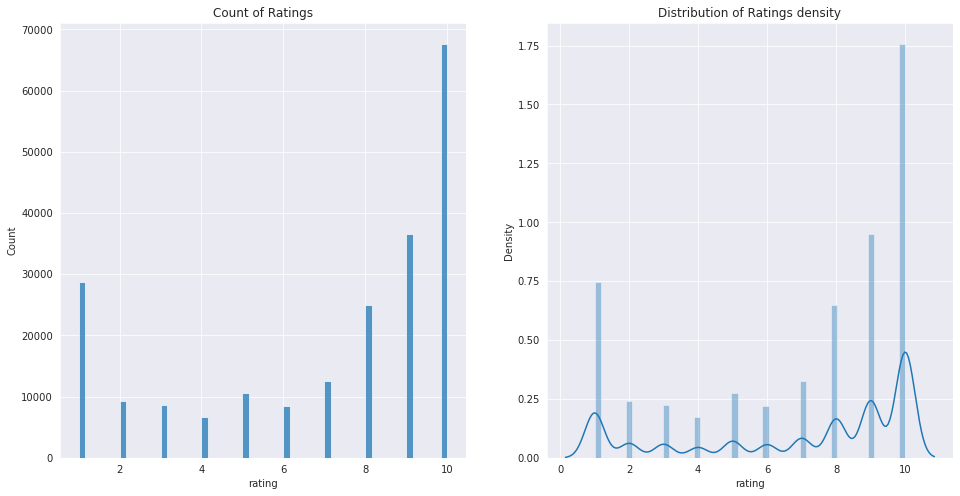

In [23]:
#plotting the distribution of ratings
f,ax = plt.subplots(1,2,figsize=(16,8))
ax1= sns.histplot(data['rating'],ax=ax[0])
ax1.set_title('Count of Ratings')
ax2= sns.distplot(data['rating'],ax=ax[1])
ax2.set_title('Distribution of Ratings density')
plt.show()

- The plot shows that most of the drugs are rated with 10,9,8 and 1 ratings. 

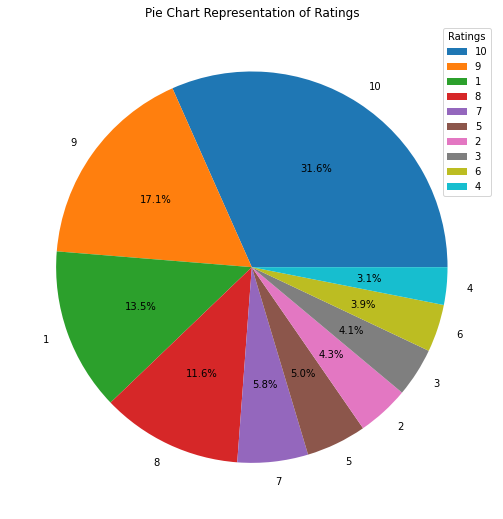

In [16]:
#plotting the percentage distribution of ratings using pie chart

ratings_count = dict(data['rating'].value_counts())
count = list(ratings_count.values())
labels = list(ratings_count.keys())
plt.figure(figsize=(18,9))
plt.pie(count,labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Representation of Ratings')
plt.legend(title='Ratings')
plt.show()

We can see ~75% of drugs are rated with 10,9,8 and 1 ratings. 

In [25]:
# chaning to date time format.

data['date']= pd.to_datetime(data['date'])

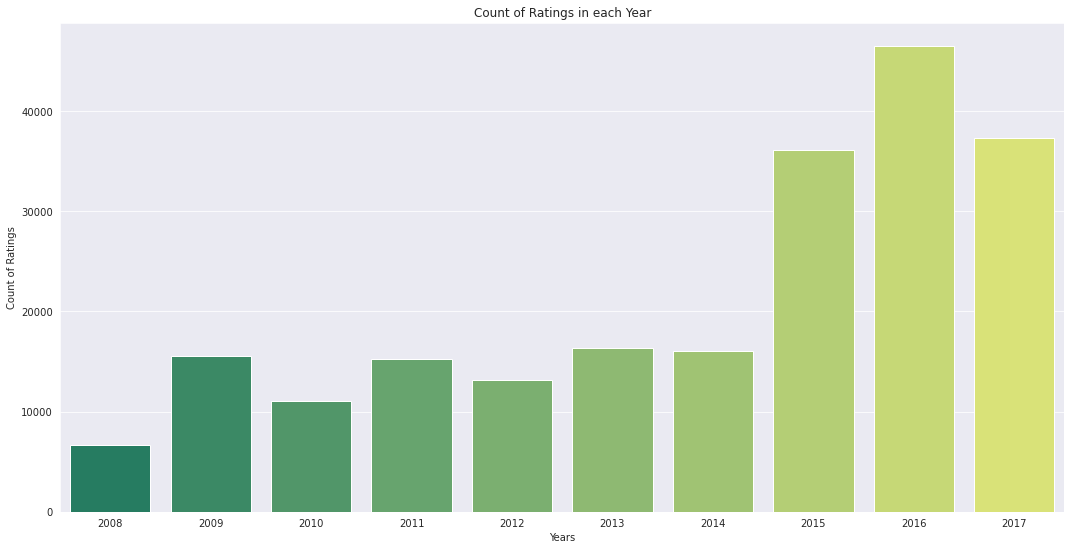

In [26]:
#checking for ratings given in each year

year_ratings = dict(data['date'].dt.year.value_counts())
years = list(year_ratings.keys())
values = list(year_ratings.values())
plt.figure(figsize=(18,9))
sns.barplot(x=years,y=values,palette='summer')
plt.xlabel('Years')
plt.ylabel('Count of Ratings')
plt.title('Count of Ratings in each Year')
plt.show()

- This plot shows that the patients starting giving reviews and ratings more from 2015. 
- We need to analyze if this date of entry has any impact on predicting the review sentiment. 

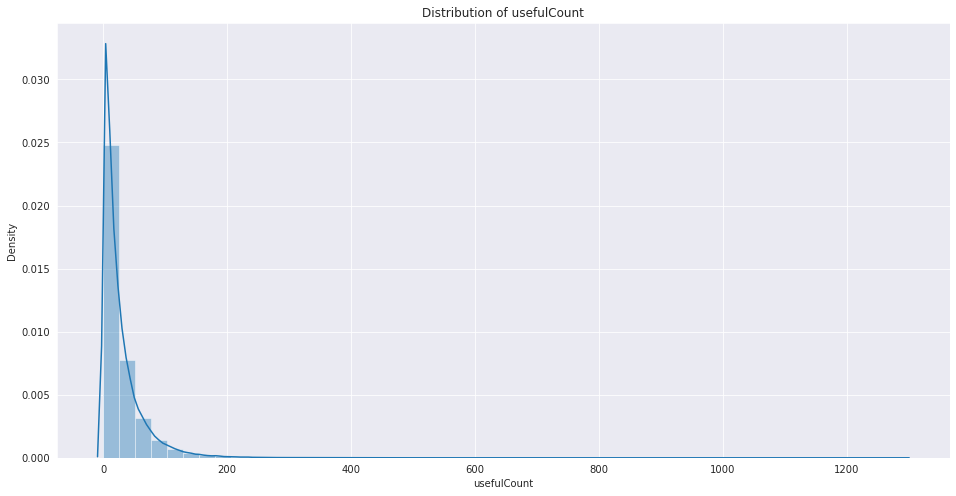

In [27]:
#checking the distribution of usefulCount feature

plt.figure(figsize=(16,8))
ax =sns.distplot(data['usefulCount'])

plt.title('Distribution of usefulCount')
plt.show()

- This plot shows that maximum number of the drug review has not more than 200 upvotes.

### Data Preprocessing

In [17]:
# creating the target feature using ratings 
# here 1 represents positive and 0 - represents negative

data['review_sentiment'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [18]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


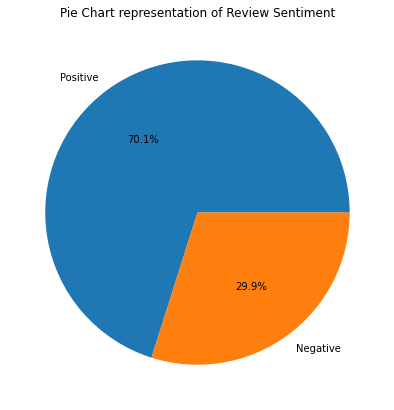

In [19]:
# Plotting the pie chart for review sentiments

plt.figure(figsize=(14,7))
plt.pie(data['review_sentiment'].value_counts(),labels=['Positive','Negative'],autopct='%1.1f%%')
plt.title('Pie Chart representation of Review Sentiment')
plt.show()

- The positive reviews are 70% of the data. This is an imbalanced data. 
- Minority class need to be oversampled to overcome the problems of impbalanced data. 

<b> Building the word cloud for positive and Negative Reviews

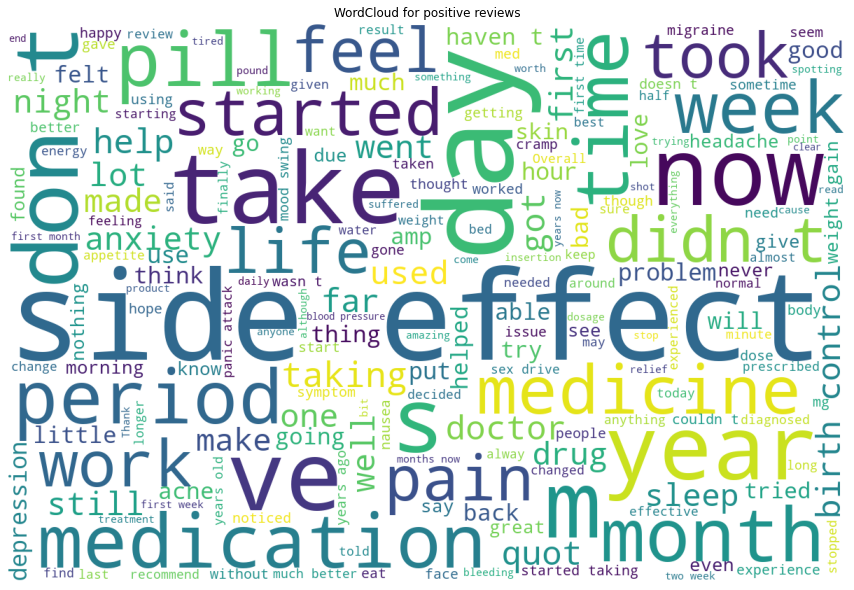

In [32]:
# word cloud for positive reviews

positive_reviews = " ".join([review for review in data['review'][data['review_sentiment'] == 1]])


stop_words = set(STOPWORDS)

wordcloud = WordCloud(width = 1200, height = 800,background_color ='white',stopwords = stop_words,min_font_size = 10).generate(positive_reviews)

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('WordCloud for positive reviews')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

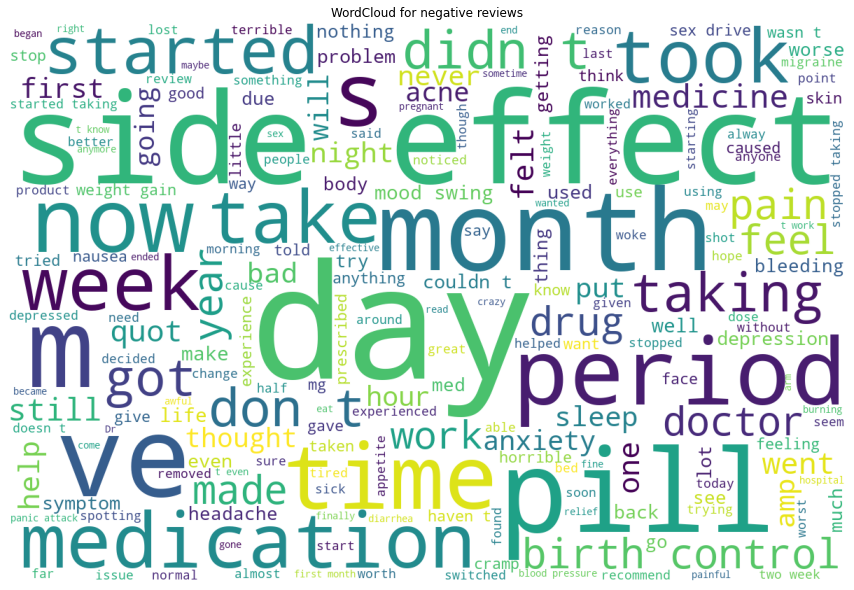

In [33]:
# word cloud for negative reviews

negative_reviews = " ".join([review for review in data['review'][data['review_sentiment'] == 0]])

wordcloud = WordCloud(width = 1200, height = 800,background_color ='white',stopwords = stop_words,min_font_size = 10).generate(negative_reviews)

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('WordCloud for negative reviews')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

- In the wordclouds, we can observe the frequent words are almost common in both the positive and negative reviews

<b>Removing the conditions which are mentioned in above form</b>

In [20]:
#this code is to remove the unwanted conditions in the above form. 

del_index = []
conds =[]
for c in data['condition']:
    if ('helpful' in c) or ('Listed' in c):
        f= list(data[data['condition']==c].index)
        del_index.extend(f)
        conds.append(c)

In [21]:
print('Size of the data before removing the conditions:',data.shape)

Size of the data before removing the conditions: (213869, 8)


In [22]:
print('The removable conditions count is:',len(conds))

The removable conditions count is: 1763


In [23]:
data.drop(del_index,inplace=True)
print('Size of the data after dropping the condtions:',data.shape)

Size of the data after dropping the condtions: (212106, 8)


In [24]:
data.reset_index(inplace=True,drop=True)
data.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment
212101,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,1
212102,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,1
212103,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,1
212104,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,0
212105,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,1


<b>Preprocessing the Reviews</b>

In [3]:
import re
from tqdm import tqdm
from nltk.corpus import stopwords

In [4]:
# referenced from previous assignments. 

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [5]:
# referenced from previous assignments. 

def preprocess_text(text_data):
    
    text_data = decontracted(text_data)
    
    text_data = text_data.replace('\n',' ')
    text_data = text_data.replace('\r',' ')
    text_data = text_data.replace('\t',' ')
    text_data = text_data.replace('-',' ')
    text_data = text_data.replace("/",' ')
    text_data = text_data.replace(">",' ')
    text_data = text_data.replace('"',' ')
    text_data = text_data.replace('?',' ')
    return text_data

In [6]:
# loading stop words from nltk library

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

#removing 'no' from the stop words list as there is an importance of 'side effects' and 'no side effects' in review
stop_words.remove('no')

def nlp_preprocessing(review):
    '''This functional block preprocess the text data by removing digits, extra spaces, stop words 
    and converting words to lower case and stemming words'''
    
    if type(review) is not int:
        string = ""
        review = preprocess_text(review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        
        review = re.sub('\s+',' ', review)
        
        review = review.lower()
        
        for word in review.split():
        
            if not word in stop_words:
                word = stemmer.stem(word)
                string += word + " "
        
        return string 

In [29]:
data['cleaned_review'] = data['review'].apply(nlp_preprocessing)

In [30]:
data['drugName'] = data['drugName'].apply(lambda x:x.lower()) # converting to lower case

In [31]:
data['condition'] = data['condition'].apply(lambda x:x.lower())

In [32]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review
0,206461,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,no side effect take combin bystol mg fish oil
1,95260,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1,son halfway fourth week intuniv becam concern ...
2,92703,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0,use take anoth oral contracept pill cycl happi...
3,138000,ortho evra,birth control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1,first time use form birth control glad went pa...
4,35696,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,suboxon complet turn life around feel healthie...


In [33]:
data.shape

(212106, 9)

In [35]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ruthvik/nltk_data...


True

In [36]:
# adding the sentiment scores for reviews and preprocessed reviews as new features

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = [sid.polarity_scores(v)['compound'] for v in data['review']]
data['sentiment_score_clean'] = [sid.polarity_scores(v)['compound'] for v in data['cleaned_review']]

In [37]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,sentiment_score,sentiment_score_clean
0,206461,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,no side effect take combin bystol mg fish oil,-0.2960,-0.2960
1,95260,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1,son halfway fourth week intuniv becam concern ...,0.8603,0.6929
2,92703,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0,use take anoth oral contracept pill cycl happi...,0.7962,0.2732
3,138000,ortho evra,birth control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1,first time use form birth control glad went pa...,0.7184,0.1027
4,35696,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,suboxon complet turn life around feel healthie...,0.9403,0.8934


In [39]:
#checking the correlation of features

data.corr()

,uniqueID,rating,usefulCount,review_sentiment,sentiment_score,sentiment_score_clean
uniqueID,1.000000,0.016206,0.017482,0.014956,0.008353,0.003485
rating,0.016206,1.000000,0.236253,0.916472,0.327503,0.200210
usefulCount,0.017482,0.236253,1.000000,0.213844,0.057637,0.016842
review_sentiment,0.014956,0.916472,0.213844,1.000000,0.304230,0.184086
sentiment_score,0.008353,0.327503,0.057637,0.304230,1.000000,0.699318
sentiment_score_clean,0.003485,0.200210,0.016842,0.184086,0.699318,1.000000


In [40]:
#data.to_csv('new_data_processed.csv',index=False)

- The useful features now are usefulCount, sentiment_score and sentiment_score_clean. 

<b>Takeaways:</b>
<br>Based on the above analysis, the below are the important features to be used in next implementation stages:
- condition - This feature can be used by performing labelencoding.
- review - The new Feature extractions can be done from reviews before preprocessing like word count,char length, avg word count,stop word count etc..
- date - New feature can be created with only year extraction and then label encoding, as we saw the analysis of year and count of reviews in respective years. 
- usefulCount - This feature is important from above correlation matrix. 
- cleaned_review - The preprocessed reviews are used after Vectorization using BoW , Tf-idf. 
- sentiment_score - This feature is important and is correlated with target feature closely. 
- sentiment_score_clean - This feature is important and is correlated with target feature closely. 

<b>Next Steps</b>
- Split the data to Train and Test.
- Encode the categorical features 
- We need to vectorize the cleaned reviews using BoW, TF-IDF and also come up with few Feature extractions from reviews and cleaned reviews.
- Normalize the numerical features.
- Apply all the above encoded features to various classificatoin algorithms to come up with best models. 
<br>
<b>Recommendation Approach </b>:
- Select the best model from each of the different set of features applied while building the model (like best model with reviews encoded using Bow, best model with applying TF-IDF , best model with some extracted/important features extracted )
- Add all the best model predicted values for each of the drug to get combined value and then multiply with usefulCount to create a new feature called recommendation score.
- For each condition among the multiple available drugs, the drug with highest recommendation score is recommended. 
